In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder




#Cargar Datos
Data = pd.read_csv('C:/Users/pemoj/OneDrive/Escritorio/UNAD ING SIS/2024 II/ANALISIS DE DATOS/Tarea 3/Anexo 2 - Dataset Vehicle/car details v3.csv')

#Mostrar Datos
Data.head(40)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [49]:
# Descripción de los datos
Data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

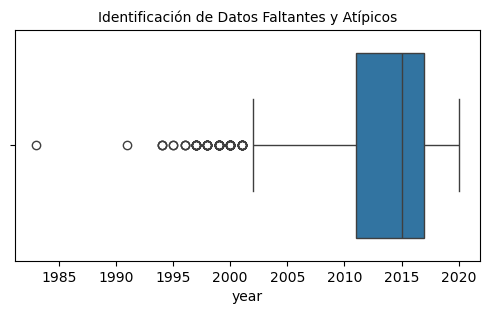

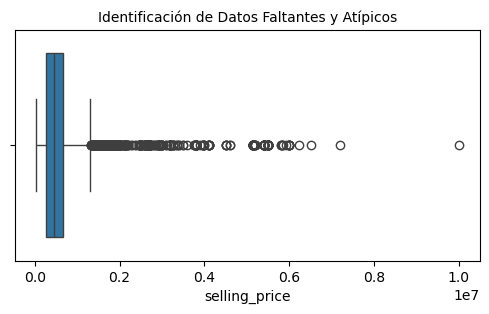

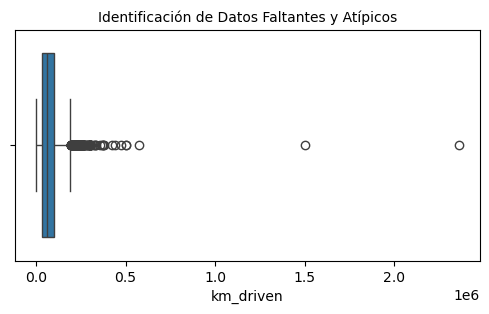

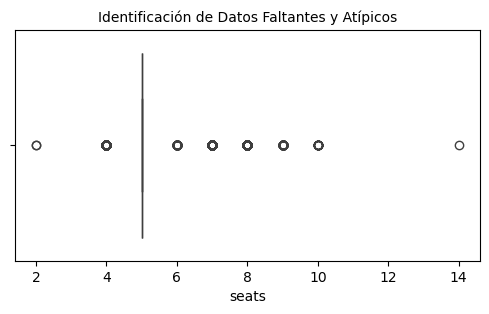

In [53]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['year'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['selling_price'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['km_driven'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['seats'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [55]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Año: ",Data['year'].isin([0]).sum())
print("Cantidad de Registros con cero en Precio de venta: ",Data['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en Kilometros recorridos: ",Data['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en Asientos ",Data['seats'].isin([0]).sum())


Cantidad de Registros con cero en Año:  0
Cantidad de Registros con cero en Precio de venta:  0
Cantidad de Registros con cero en Kilometros recorridos:  0
Cantidad de Registros con cero en Asientos  0


In [57]:
# Manejar datos faltantes
Data.replace(0, np.nan, inplace=True)
Data.fillna(Data.mean(numeric_only=True), inplace=True)
Data.fillna('NA',inplace=True)

In [59]:
# Definir límites para datos atípicos
max_seats = 10
min_seats = 2
total_seats = ((Data['seats'] < min_seats) | (Data['seats'] > max_seats)).sum()

max_year = 2020
min_year = 1990
total_year = ((Data['year'] < min_year) | (Data['year'] > max_year)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para la cantidad de asientos es {}".format(total_seats))
print("El total de datos atípicos para el año es {}".format(total_year))
print("")
Data.info()

Total registros dataset: 8128
El total de datos atípicos para la cantidad de asientos es 1
El total de datos atípicos para el año es 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [61]:
# Filtra Datos Atípicos

Data=Data[(Data['year']<max_year)&(Data['year']>min_year)]
Data=Data[(Data['seats']<max_seats)&(Data['year']>min_seats)]

In [63]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Data['year']<min_year)|(Data['year']>max_year)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

Total_Atipicos=((Data['seats']<min_seats)|(Data['seats']>max_seats)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0
El total de datos atípicos es 0


In [183]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        8033 non-null   object 
 9   engine         8033 non-null   object 
 10  max_power      8033 non-null   object 
 11  torque         8033 non-null   object 
 12  seats          8033 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 878.6+ KB


Intercepto (β0): -168899179.14976227
Coeficiente (year, β1): [84188.81041318]


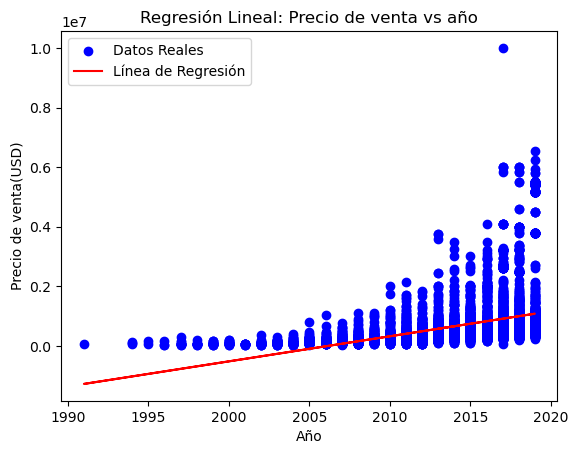

In [65]:
# Convertir los datos en un DataFrame
df = pd.DataFrame(Data)
# Variables independientes (año, km_driven) y dependiente (Precio de venta)
X = df[['year']]
y = df['selling_price']
# Crear un modelo de regresión lineal
modelo = LinearRegression()
# Ajustar el modelo a los datos
modelo.fit(X, y)
# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_  # Pendientes (año, km_driven)
# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (year, β1): {beta_1}")
# Visualizar la regresión (opcional para datos simples)
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(df['year'], modelo.predict(X), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal: Precio de venta vs año')
plt.xlabel('Año')
plt.ylabel('Precio de venta(USD)')
plt.legend()
plt.show()


In [ ]:
Regresion Lineal Multiple

Intercepto (β0): -158397146.80179366
Coeficiente (Year, β1): 79004.58427758187
Coeficiente (Km Driven, β2): -0.8873830529525691


C:\Users\pemoj\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


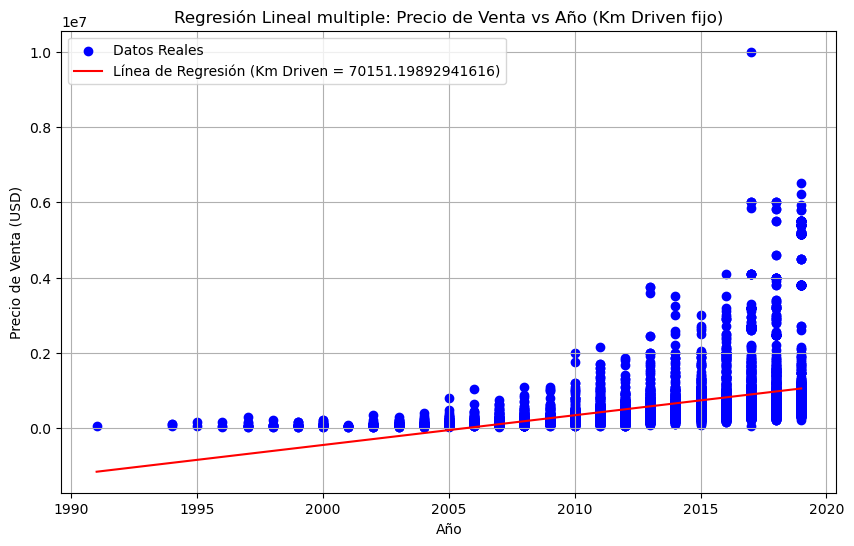

In [79]:
# Convertir los datos en un DataFrame 
df = pd.DataFrame(Data)

# Variables independientes (year y km_driven) y dependiente (selling_price)
X = df[['year', 'km_driven']]
y = df['selling_price']

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1, beta_2 = modelo.coef_  # Pendientes (year y km_driven)

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficiente (Year, β1): {beta_1}")
print(f"Coeficiente (Km Driven, β2): {beta_2}")

# Visualización de la regresión (manteniendo constante km_driven)
km_driven_fijo = df['km_driven'].mean()  # Fijar el km_driven en la media para el gráfico
year_range = np.linspace(df['year'].min(), df['year'].max(), 100)

# Predecir manteniendo km_driven constantes
predicciones_fijas = modelo.predict(np.column_stack((year_range, np.full_like(year_range, km_driven_fijo))))

# Graficar los datos reales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], y, color='blue', label='Datos Reales')
plt.plot(year_range, predicciones_fijas, color='red', label=f'Línea de Regresión (Km Driven = {km_driven_fijo})')
plt.title('Regresión Lineal multiple: Precio de Venta vs Año (Km Driven fijo)')
plt.xlabel('Año')
plt.ylabel('Precio de Venta (USD)')
plt.legend()
plt.grid()
plt.show()

In [97]:
#Ajustar columnas tipo object para poder procesarlos en el modelo

data_numerica = Data.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

In [99]:
# Total de vehiculos vendidos

Data['year'].value_counts()

year
2017    1018
2016     856
2018     807
2015     773
2013     669
2012     650
2014     620
2011     590
2019     583
2010     392
2009     245
2008     213
2007     182
2006     123
2005      96
2004      62
2003      49
2002      26
2000      21
1999      18
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1991       1
Name: count, dtype: int64

In [119]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_numerica.drop('year', axis=1)
Y = data_numerica['selling_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)



In [103]:
#Validar datos en train
X_train.head(2)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,predicted_price
435,1914,570000,134000,1,1,1,2,44,84,7,181,7.0,125149.098494
4408,928,550000,70000,1,1,1,2,31,71,46,281,9.0,418955.366716


In [105]:
#Validar datos en test
X_test.head(2)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,predicted_price
7230,1292,750000,110000,1,1,1,2,377,13,243,172,5.0,8.574876e+05
2355,1341,720000,20000,3,1,1,0,302,10,259,41,5.0,1.016357e+06


In [107]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [109]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [111]:
print (Prediccion)

[ 750000.  720000.  325000. ...  325000.  900000. 1380000.]


In [113]:
# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, Prediccion))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, Prediccion))

Coeficientes: [ 1.14864335e-13  1.00000000e+00 -3.29540215e-16  3.57578355e-11
  3.93381133e-11  6.70171037e-11 -2.29519689e-11 -1.35559023e-13
  1.70884128e-13  3.17454675e-15 -8.24640640e-14 -2.99580627e-11
  6.29540163e-17]
Error cuadrático medio: 1.9459741359912901e-19
Coeficiente de determinación (R^2): 1.0


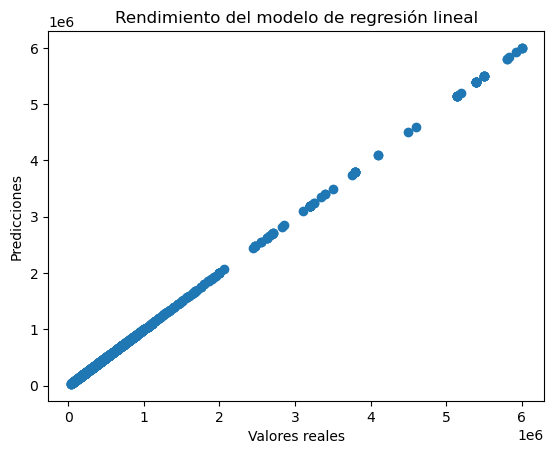

In [115]:
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal")
plt.show()

Coeficientes: [ 1.14864335e-13  1.00000000e+00 -3.29540215e-16  3.57578355e-11
  3.93381133e-11  6.70171037e-11 -2.29519689e-11 -1.35559023e-13
  1.70884128e-13  3.17454675e-15 -8.24640640e-14 -2.99580627e-11
  6.29540163e-17]
R² (Coeficiente de determinación): 0.1706138942765425
Error Absoluto Medio (MAE): 377932.25699532795
Error Cuadrático Medio (MSE): 531679710646.2984
Raíz del Error Cuadrático Medio (RMSE): 729163.7063419287


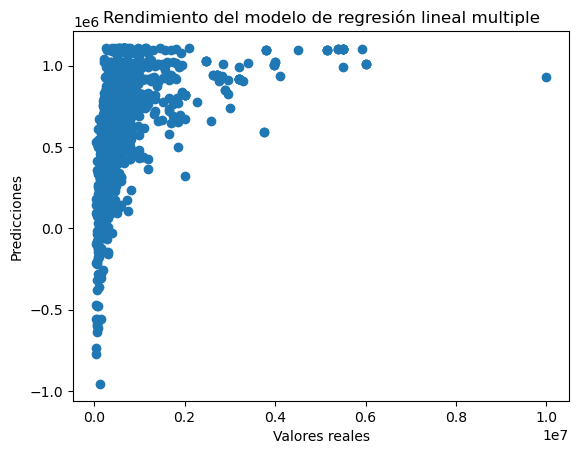

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.DataFrame(Data)

# Variables independientes (year y km_driven) y dependiente (selling_price)
X = df[['year', 'km_driven']]
y = df['selling_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Realizar predicciones en los datos de prueba
Prediccion = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(Y_test, Prediccion)
mae = mean_absolute_error(Y_test, Prediccion)
mse = mean_squared_error(Y_test, Prediccion)
rmse = np.sqrt(mse)

# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
# Imprimir las métricas
print(f'R² (Coeficiente de determinación): {r2}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal multiple")
plt.show()